<a href="https://colab.research.google.com/github/Nanungi/project-2/blob/main/project_2_part_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#import libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector

In [ ]:
#loading data
data='/content/drive/MyDrive/CodingDojo/02-IntroML/Week08/Data/Metabolic  Syndrome.csv'
df=pd.read_csv(data)
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [ ]:
#checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [ ]:
#dropping seqn
df=df.drop(columns='seqn')
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [ ]:
#checking for null values
df.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

#null values are to be imputed

In [ ]:
#checking inconsistencies
for col in df.select_dtypes('object'):
  print(df[col].value_counts())

Sex
Female    1211
Male      1190
Name: count, dtype: int64
Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: count, dtype: int64
Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64
MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: count, dtype: int64


In [ ]:
# checking for outliers and inconsistencies
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [ ]:
#check duplicates
df.duplicated().sum()

0

In [ ]:
# Separate features vs target & train/test split
X = df.drop(columns = 'MetabolicSyndrome')
y = df['MetabolicSyndrome']


In [ ]:
#test,train,split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
263,46,Female,Married,8200.0,White,124.0,40.8,0,18.47,3.3,140,53,198
2073,34,Male,Separated,3500.0,MexAmerican,86.2,24.5,0,16.14,6.1,114,83,60
632,33,Female,Married,3500.0,MexAmerican,75.0,25.0,0,11.54,3.4,97,44,60
1732,49,Female,Married,9000.0,Hispanic,95.7,33.3,0,3.81,2.7,89,51,139
765,30,Male,Married,9000.0,Asian,75.7,21.9,0,7.76,7.1,81,58,394


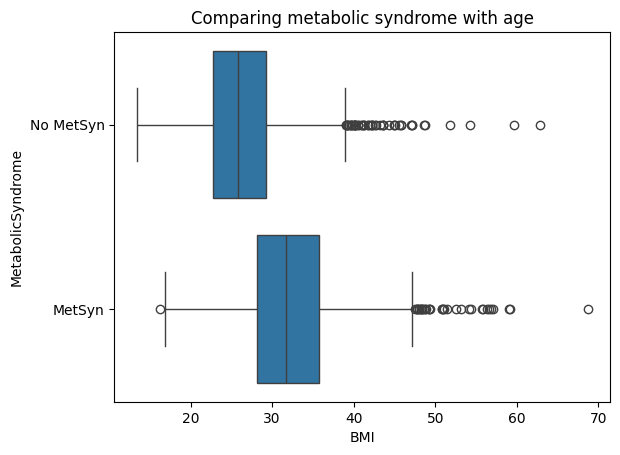

In [ ]:
#boxplot
ax = sns.boxplot(data=df, y='MetabolicSyndrome', x='BMI')
ax.set_title("Comparing metabolic syndrome with age");

#with increase in age there is an increase in people diagnosed with metabolic syndrome.

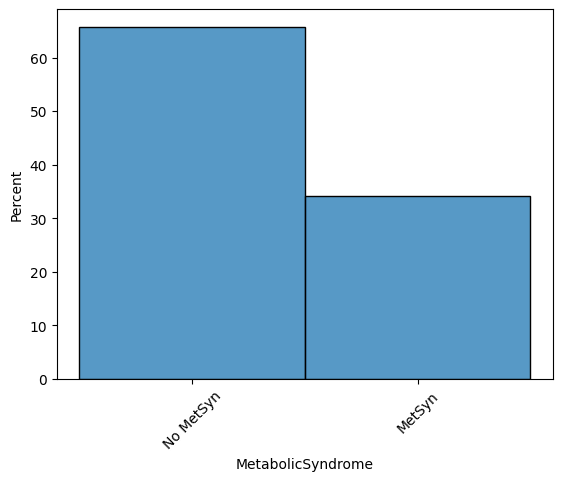

In [ ]:
#histogram showing percentages of metabolic syndrome.
ax = sns.histplot(data=df, x='MetabolicSyndrome',  stat='percent')
ax.tick_params(axis='x', rotation = 45);

#there is a higher percentage of non metabolic syndrome patients than those with the syndrome

In [6]:
#define columns,impute,instatiate,make tuples
cat_selector = make_column_selector(dtype_include='object')
freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_tuple = ('categorical',cat_pipe, cat_selector)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x796e66015d50>)

In [ ]:
#define columns,impute,instatiate,make tuples
num_selector = make_column_selector(dtype_include='number')
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
num_pipe = make_pipeline(mean_imputer, scaler)
num_tuple = ('numeric',num_pipe, num_selector)
num_tuple

In [ ]:
# Create the preprocessing ColumnTransformer
preprocessor = ColumnTransformer([cat_tuple, num_tuple],
                                 verbose_feature_names_out=False)
preprocessor